In [1]:
import numpy as np
from astropy.table import Table
from matplotlib import pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
rc('font', family='serif')
rc('font', size=14)

## MCCL red galaxies

This example runs a number of SkyPy modules to create a catalogue of galaxies using our implementation of the MCCL model of [Herbel et al (2018)](https://arxiv.org/abs/1801.07615) and [Kacprzak et al (2020)](https://arxiv.org/abs/1906.01018).

Running the `mccl_galaxies` example:
```bash
$ skypy mccl_galaxies.yml --format fits
```
generates an output catalogue for us to load in:

In [2]:
red_galaxies = Table.read('red_galaxies.fits')

In [3]:
print(red_galaxies.info)

<Table length=37265>
         name          dtype  shape unit
--------------------- ------- ----- ----
             redshift float64           
            magnitude float64           
        physical_size float64        kpc
          ellipticity float64           
         angular_size float64        rad
spectral_coefficients float64  (5,)     



We have asked to generate a table containing a number of columns for objects called red galaxies. Here we make a quick visual check of the columns.

We have asked for redshifts and magnitudes over the given redshift range and magnitude limit:

```yaml
z_range: !numpy.arange [0, 2.01, 0.1]
mag_lim: 30

red_galaxies:
    redshift, magnitude: !skypy.galaxy.schechter_lf
      redshift: $z_range
      M_star: $M_star_red
      phi_star: $phi_star_red
      alpha: $alpha_red
      m_lim: $mag_lim
      fsky: $fsky
```

In [4]:
plt.figure()
plt.hist2d(red_galaxies['redshift'], red_galaxies['magnitude'], bins=50)
plt.xlabel('$z$')
plt.ylabel('$m$')

Text(0, 0.5, '$m$')

TimeoutError: Lock error: Matplotlib failed to acquire the following lock file:
    /Users/harrison/.matplotlib/tex.cache/bc400cd8ba1f12a777caa16d8c77291f.tex.matplotlib-lock
This maybe due to another process holding this lock file.  If you are sure no
other Matplotlib process is running, remove this file and try again.

<Figure size 432x288 with 1 Axes>

Text(0.5, 0, '$z$')

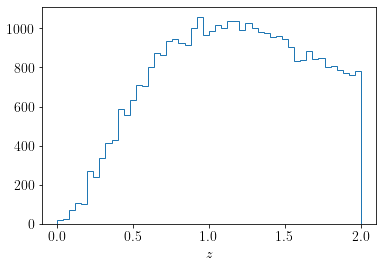

In [5]:
plt.figure()
plt.hist(red_galaxies['redshift'], histtype='step', bins=50)
plt.xlabel('$z$')

Text(0.5, 0, '$m$')

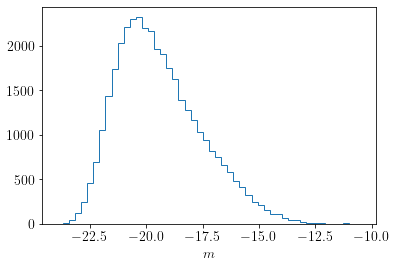

In [6]:
plt.figure()
plt.hist(red_galaxies['magnitude'], histtype='step', bins=50)
plt.xlabel('$m$')

We also asked to generate physical sizes:
```yaml
    physical_size: !skypy.galaxy.size.early_type_lognormal
      magnitude: $red_galaxies.magnitude
      a: 0.60
      b: -4.63
      M0: -20.52
      sigma1: 0.48
      sigma2: 0.25
```

Text(0.5, 0, '$d\\,$[kpc]')

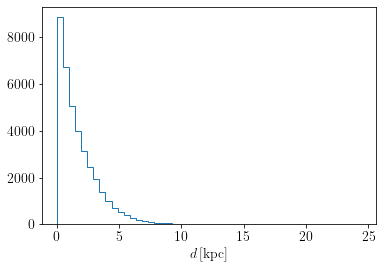

In [7]:
plt.figure()
plt.hist(red_galaxies['physical_size'], histtype='step', bins=50)
plt.xlabel('$d\,$[kpc]')

Ellipticities:
```yaml
    ellipticity: !skypy.galaxy.ellipticity.beta_ellipticity
      e_ratio: 0.45
      e_sum: 3.5
      size: !len [$red_galaxies.redshift]
```

Text(0.5, 0, '$|e|$')

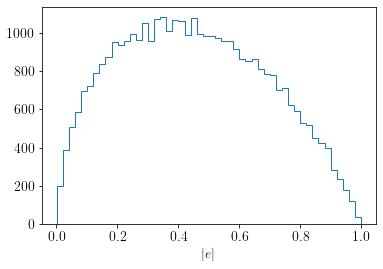

In [8]:
plt.figure()
plt.hist(red_galaxies['ellipticity'], histtype='step', bins=50)
plt.xlabel('$|e|$')

Angular sizes:
```yaml
    angular_size: !skypy.galaxy.size.angular_size
      physical_size: $red_galaxies.physical_size
      redshift: $red_galaxies.redshift
```

Text(0.5, 0, '$\\theta\\,$[rad]')

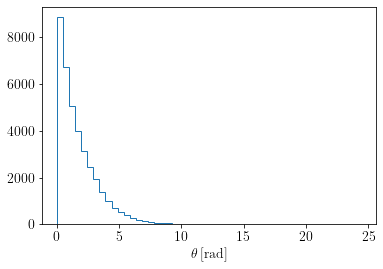

In [9]:
plt.figure()
plt.hist(red_galaxies['physical_size'], histtype='step', bins=50)
plt.xlabel('$\\theta\,$[rad]')

And coefficients for the combination of spectral templates (which can be used to create an SED):
```yaml
    spectral_coefficients: !skypy.galaxy.spectrum.dirichlet_coefficients
      alpha0: [2.461, 2.358, 2.568, 2.268, 2.402]
      alpha1: [2.410, 2.340, 2.200, 2.540, 2.464]
      weight: [3.84e+09, 1.57e+06, 3.91e+08, 4.66e+10, 3.03e+07]
      redshift: $red_galaxies.redshift
```

Text(0.5, 0, '$c_{i}$')

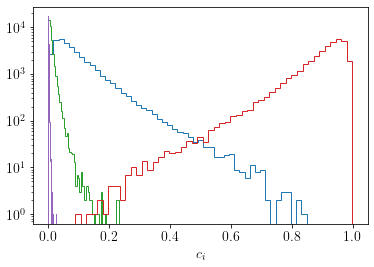

In [10]:
plt.figure()
for spc in red_galaxies['spectral_coefficients'].T:
    plt.hist(spc, histtype='step', bins=50)
plt.yscale('log')
plt.xlabel('$c_{i}$')